# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# !pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=965f6045e5c7faef2b954436d136ac8175e5477e4507dbf07e9823883c130c54
  Stored in directory: c:\users\30798\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lere
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | pyaozerskiy
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | porto novo
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kenora
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | san jeronimo
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | tiksi
Proc

Processing Record 37 of Set 4 | homer
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | yamada
Processing Record 40 of Set 4 | znamenka
Processing Record 41 of Set 4 | faya
Processing Record 42 of Set 4 | jyvaskyla
Processing Record 43 of Set 4 | soure
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | khonuu
City not found. Skipping...
Processing Record 46 of Set 4 | santiago
Processing Record 47 of Set 4 | lima
Processing Record 48 of Set 4 | nantucket
Processing Record 49 of Set 4 | monterey
Processing Record 0 of Set 5 | sundargarh
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | moron
Processing Record 5 of Set 5 | praya
Processing Record 6 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 7 of Set 5 | kassala
Processing Record 8 of Set 5 | shingu
Processing Record 9 of Set 5 | nome
Processing Record 10 of Se

Processing Record 23 of Set 8 | ketchikan
Processing Record 24 of Set 8 | holme
Processing Record 25 of Set 8 | kapoeta
Processing Record 26 of Set 8 | west bay
Processing Record 27 of Set 8 | lucea
Processing Record 28 of Set 8 | sfantu gheorghe
Processing Record 29 of Set 8 | kozmodemyansk
Processing Record 30 of Set 8 | dunedin
Processing Record 31 of Set 8 | santa cruz
Processing Record 32 of Set 8 | vung tau
Processing Record 33 of Set 8 | zhanaozen
Processing Record 34 of Set 8 | caucaia
Processing Record 35 of Set 8 | port lincoln
Processing Record 36 of Set 8 | garissa
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | saint george
Processing Record 39 of Set 8 | kalmunai
Processing Record 40 of Set 8 | necochea
Processing Record 41 of Set 8 | vanderhoof
Processing Record 42 of Set 8 | mezen
Processing Record 43 of Set 8 | coihaique
Processing Record 44 of Set 8 | hofn
Processing Record 45 of Set 8 | polewali
Processing Record 46 of Set 8 | porbandar
Proces

City not found. Skipping...
Processing Record 10 of Set 12 | zvishavane
Processing Record 11 of Set 12 | roebourne
Processing Record 12 of Set 12 | piste
Processing Record 13 of Set 12 | russell
Processing Record 14 of Set 12 | hambantota
Processing Record 15 of Set 12 | huicheng
Processing Record 16 of Set 12 | grand gaube
Processing Record 17 of Set 12 | mbengwi
Processing Record 18 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 19 of Set 12 | naftah
City not found. Skipping...
Processing Record 20 of Set 12 | monrovia
Processing Record 21 of Set 12 | wollongong
Processing Record 22 of Set 12 | mahon
Processing Record 23 of Set 12 | laurel
Processing Record 24 of Set 12 | nouakchott
Processing Record 25 of Set 12 | mokhsogollokh
Processing Record 26 of Set 12 | sale
Processing Record 27 of Set 12 | iranshahr
Processing Record 28 of Set 12 | shenjiamen
Processing Record 29 of Set 12 | talnakh
Processing Record 30 of Set 12 | zhangjiakou
Processing Record 31 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lere,10.3870,8.5726,18.13,34,98,1.44,NG,1667700017
1,puerto ayora,-0.7393,-90.3518,18.83,78,14,4.85,EC,1667700018
2,mataura,-46.1927,168.8643,16.46,42,16,2.86,NZ,1667700018
3,yellowknife,62.4560,-114.3525,-18.58,78,20,3.09,CA,1667699760
4,qaanaaq,77.4840,-69.3632,-14.00,73,100,5.55,GL,1667700019


In [9]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lere,10.3870,8.5726,18.13,34,98,1.44,NG,2022-11-06
1,puerto ayora,-0.7393,-90.3518,18.83,78,14,4.85,EC,2022-11-06
2,mataura,-46.1927,168.8643,16.46,42,16,2.86,NZ,2022-11-06
3,yellowknife,62.4560,-114.3525,-18.58,78,20,3.09,CA,2022-11-06
4,qaanaaq,77.4840,-69.3632,-14.00,73,100,5.55,GL,2022-11-06
...,...,...,...,...,...,...,...,...,...
560,san joaquin,37.9333,-121.3011,17.07,66,100,1.54,US,2022-11-06
561,soyo,-6.1349,12.3689,24.36,89,100,1.89,AO,2022-11-06
562,raychikhinsk,49.7838,129.4121,-3.28,55,0,1.87,RU,2022-11-06
563,tombouctou,20.0000,-3.0000,22.96,19,0,4.27,ML,2022-11-06


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lere,10.3870,8.5726,18.13,34,98,1.44,NG,2022-11-06
1,puerto ayora,-0.7393,-90.3518,18.83,78,14,4.85,EC,2022-11-06
2,mataura,-46.1927,168.8643,16.46,42,16,2.86,NZ,2022-11-06
3,yellowknife,62.4560,-114.3525,-18.58,78,20,3.09,CA,2022-11-06
4,qaanaaq,77.4840,-69.3632,-14.00,73,100,5.55,GL,2022-11-06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

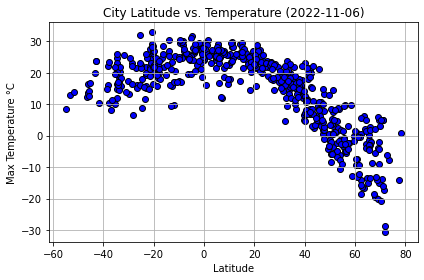

In [79]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

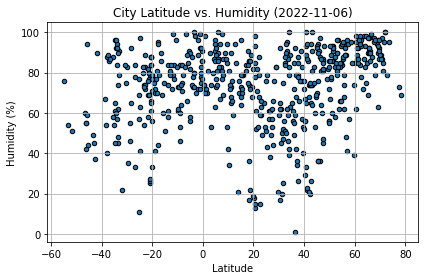

In [93]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

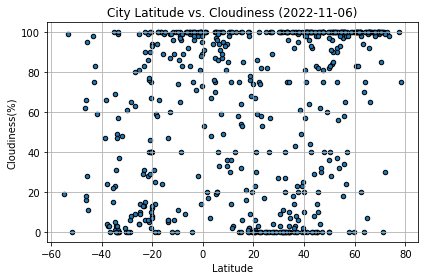

In [96]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

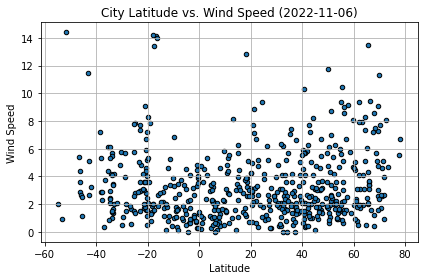

In [97]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lere,10.3870,8.5726,18.13,34,98,1.44,NG,2022-11-06
3,yellowknife,62.4560,-114.3525,-18.58,78,20,3.09,CA,2022-11-06
4,qaanaaq,77.4840,-69.3632,-14.00,73,100,5.55,GL,2022-11-06
5,pyaozerskiy,65.8333,31.1667,-1.60,92,92,3.35,RU,2022-11-06
7,porto novo,6.4965,2.6036,25.10,87,94,0.88,BJ,2022-11-06


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,18.83,78,14,4.85,EC,2022-11-06
2,mataura,-46.1927,168.8643,16.46,42,16,2.86,NZ,2022-11-06
6,cape town,-33.9258,18.4232,17.29,84,0,5.66,ZA,2022-11-06
8,rikitea,-23.1203,-134.9692,21.92,74,31,7.38,PF,2022-11-06
9,tuatapere,-46.1333,167.6833,13.71,55,66,4.39,NZ,2022-11-06


###  Temperature vs. Latitude Linear Regression Plot

Line equation: y = -0.57x + 32.77
The r-value is: -0.8788853881125147


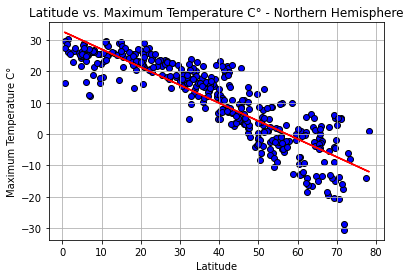

In [111]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Line equation: y = 0.24x + 26.3
The r-value is: 0.572248374283076


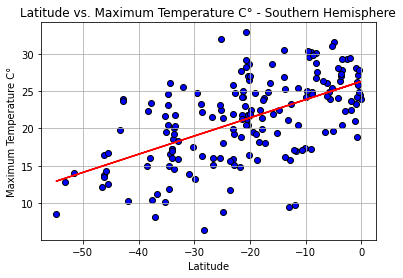

In [112]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. Maximum Temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Line equation: y = 0.24x + 64.93
The r-value is: 0.2366816406283552


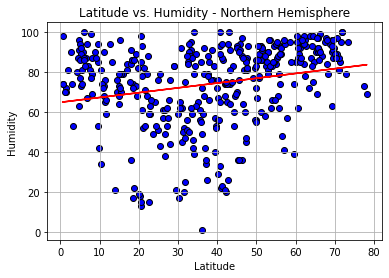

In [113]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Line equation: y = 0.41x + 80.5
The r-value is: 0.30506286036463043


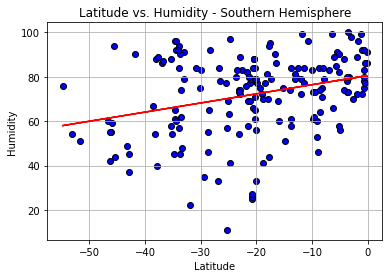

In [114]:
# Southern Hemisphere

# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and humidity based on the data available. The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humdity. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Line equation: y = 0.57x + 42.71
The r-value is: 0.2832170731140446


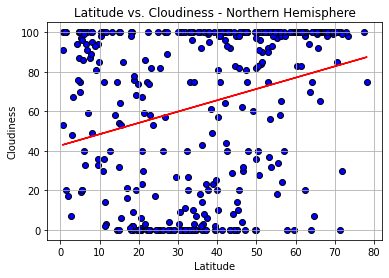

In [115]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Line equation: y = 1.32x + 81.73
The r-value is: 0.4402293286311287


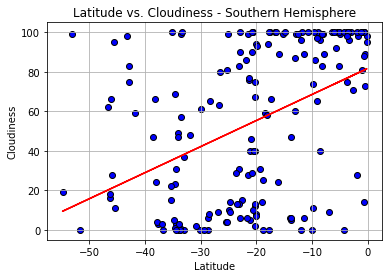

In [116]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and cloudiness based on the data available. The linear equation for each hemisphere shows a positive correlation, which implies that proximity to the equator has no bearing on cloudiness. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Line equation: y = 0.03x + 2.17
The r-value is: 0.23554892940871164


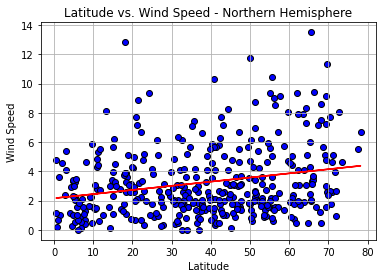

In [117]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Line equation: y = -0.05x + 2.32
The r-value is: -0.22279697293783546


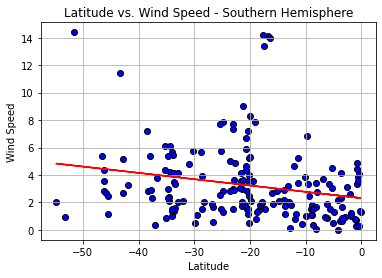

In [118]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and wind speed based on the data available. The r-value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.